# 数据预处理

In [1]:
import pandas as pd #导入pandas模块
data=pd.read_csv('D:/anaconda/testt/python与数理统计/大作业1/Basket.csv')
data = data.iloc[:,:]
data

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018/6/1,D007,3,250458,8.00
1,2018/6/1,D007,3,250200,32.70
2,2018/6/1,D007,1,161068,16.80
3,2018/6/1,D007,8,5325,30.40
4,2018/6/1,D007,8,5361,191.30
...,...,...,...,...,...
571547,2018/7/5,A010,2,284211,34.71
571548,2018/7/5,A010,2,284601,44.80
571549,2018/7/5,A010,2,284241,6.50
571550,2018/7/5,A010,2,284352,15.90


In [2]:
data.isnull().any()#查看所有缺失值

SHOP_DATETIME    False
STORE_CODE       False
POS_NO           False
BASK_CODE        False
BASK_SPEND       False
dtype: bool

In [3]:
data.describe()#查看数据分布情况

,POS_NO,BASK_CODE,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


In [4]:
data1=data[data['BASK_SPEND']>0]  #剔除data中bask_spend列小于0的行
data1

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018/6/1,D007,3,250458,8.00
1,2018/6/1,D007,3,250200,32.70
2,2018/6/1,D007,1,161068,16.80
3,2018/6/1,D007,8,5325,30.40
4,2018/6/1,D007,8,5361,191.30
...,...,...,...,...,...
571547,2018/7/5,A010,2,284211,34.71
571548,2018/7/5,A010,2,284601,44.80
571549,2018/7/5,A010,2,284241,6.50
571550,2018/7/5,A010,2,284352,15.90


In [5]:
data1.describe()#查看数据分布情况

,POS_NO,BASK_CODE,BASK_SPEND
count,569797.000000,569797.000000,569797.000000
mean,2.994330,167572.136898,39.583197
std,2.502507,87224.915886,196.158166
min,1.000000,961.000000,0.010000
25%,1.000000,90673.000000,9.000000
50%,2.000000,177692.000000,20.000000
75%,3.000000,238933.000000,44.800000
max,20.000000,323914.000000,79920.000000


In [6]:
data1.duplicated().sum()#查看是否有重复值

0

# 商店分析

In [7]:
#商店按消费额大小排序
data1.groupby('STORE_CODE')['BASK_SPEND'].sum().reset_index().sort_values(by = 'BASK_SPEND',ascending = False).head(10)

,STORE_CODE,BASK_SPEND
0,A001,3.478348e+06
15,D002,3.177385e+06
20,D007,1.382203e+06
4,A008,1.324641e+06
8,A013,1.126551e+06
2,A006,9.439233e+05
7,A012,8.546610e+05
17,D004,8.153388e+05
19,D006,8.144365e+05
5,A009,8.052129e+05


<AxesSubplot:xlabel='STORE_CODE'>

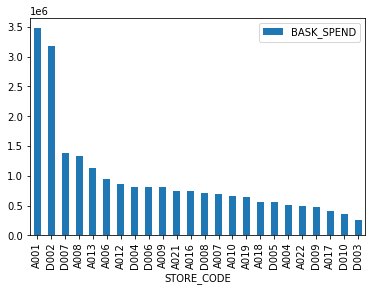

In [8]:
a=data1.groupby('STORE_CODE')['BASK_SPEND'].sum().reset_index().sort_values(by = 'BASK_SPEND',ascending = False)#商店按消费额大小排序
a.set_index('STORE_CODE',inplace=True)
#plt.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['axes.unicode_minus'] = False
#plt.xlabel('消费总额')
a.plot(kind='bar')

In [9]:
#商店按结账次数大小排序
data1.loc[:,'STORE_CODE'].value_counts()

A001    66507
D002    62949
D007    37503
A008    36462
A013    30064
A006    28470
A012    24946
A009    21809
D004    21362
D008    21029
A021    20555
A010    19543
D006    18572
A016    18279
A007    17954
A019    16985
D009    15827
A018    15731
D005    15261
A022    15260
A004    13429
A017    12459
D010    11070
D003     7771
Name: STORE_CODE, dtype: int64

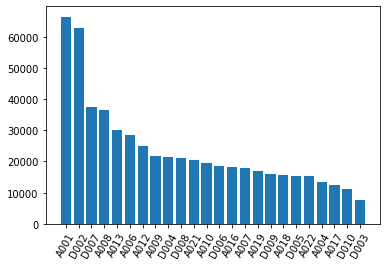

In [10]:
import numpy as np
import matplotlib.pyplot as plt
count = data1.loc[:,'STORE_CODE'].value_counts()
name = list(count.index)
plt.bar(np.arange(len(name)), count)
# 设置横坐标
plt.xticks(np.arange(len(name)), name, rotation=60)   # rotation 旋转横坐标标签
plt.show()

# 销售额分析

In [11]:
data1["SHOP_DATETIME"] = pd.to_datetime(data1["SHOP_DATETIME"])
data1['year'] = data1["SHOP_DATETIME"].dt.year
data1['month'] = data1['SHOP_DATETIME'].values.astype('datetime64[M]')

<ipython-input-11-2a10d77ebe43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["SHOP_DATETIME"] = pd.to_datetime(data1["SHOP_DATETIME"])
<ipython-input-11-2a10d77ebe43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['year'] = data1["SHOP_DATETIME"].dt.year
<ipython-input-11-2a10d77ebe43>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [12]:
data1.sample(5)

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND,year,month
98139,2018-06-12,A001,2,130458,63.70,2018,2018-06-01
317522,2018-06-18,A016,1,90212,18.01,2018,2018-06-01
219611,2018-06-08,A016,1,82908,3.00,2018,2018-06-01
115323,2018-06-23,D006,3,156840,20.00,2018,2018-06-01
343002,2018-07-01,A008,3,179565,40.35,2018,2018-07-01


In [13]:
sales_data = data1[['SHOP_DATETIME','BASK_SPEND','month']]
sales_year = sales_data.groupby(['month','SHOP_DATETIME']).sum()
sales_year.style.background_gradient()# 颜色越深，销售额越高

In [14]:
#按照年份、月份对销售子数据集进行分组求和
sales_month = data1[['SHOP_DATETIME','BASK_SPEND','month']]
sales_month = sales_month.groupby(['month','SHOP_DATETIME']).sum()
sales_month

BASK_SPEND
month      SHOP_DATETIME            
2018-06-01 2018-06-01      719667.99
           2018-06-02      730030.08
           2018-06-03      685279.36
           2018-06-04      560063.10
           2018-06-05      665581.44
           2018-06-06      501199.09
           2018-06-07      437448.31
           2018-06-08      565651.69
           2018-06-09      681885.49
           2018-06-10      705195.22
           2018-06-11      534259.96
           2018-06-12      572481.76
           2018-06-13      727913.43
           2018-06-14      618915.51
           2018-06-15      778783.56
           2018-06-16     1174917.21
           2018-06-17     1510911.65
           2018-06-18     1262614.63
           2018-06-19      414874.54
           2018-06-20      534955.10
           2018-06-21      500594.66
           2018-06-22      413119.48
           2018-06-23      584638.18
           2018-06-24      530338.27
           2018-06-25      457661.50
           2018-06-26      454940.73
           2018-06-27      530495.24
           2018-06-28      440942.21
           2018-06-29      570843.03
           2018-06-30      721941.00
2018-07-01 2018-07-01      659030.13
           2018-07-02      616250.51
           2018-07-03      632443.83
           2018-07-04      561606.46
           2018-07-05      496912.42

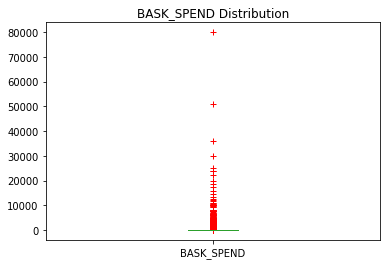

In [15]:
datatemp2=data1["BASK_SPEND"]
datatemp2.plot(kind='box',title='BASK_SPEND Distribution',sym='r+');

In [16]:
print(data1[data1['BASK_SPEND'] > 800].count())

SHOP_DATETIME    712
STORE_CODE       712
POS_NO           712
BASK_CODE        712
BASK_SPEND       712
year             712
month            712
dtype: int64


In [17]:
# 直接剔除异常值
data2 = data1[data1['BASK_SPEND'] < 80]

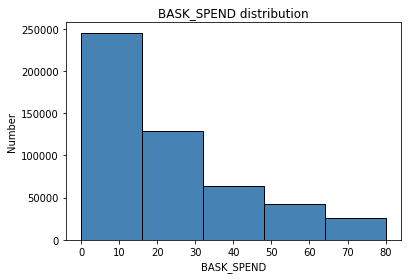

In [18]:
import matplotlib.pyplot as plt
plt.hist(x = data2.BASK_SPEND, # 指定绘图数据
          bins = 5, # 指定直方图中条块的个数
         color = 'steelblue', # 指定直方图的填充色
         edgecolor = 'black' # 指定直方图的边框色          
        )
# 添加x轴和y轴标签
plt.xlabel('BASK_SPEND')
plt.ylabel('Number')

plt.title('BASK_SPEND distribution')
 # 显示图形
plt.show()